# Bias Mitigation Analysis - Adult

In [1]:
data_name = 'Adult'

In [2]:
from analysis_utils import *
%matplotlib inline

In [3]:
# define desired metric for the use case
ACC_METRIC = 'avg_norm_mcc_score'
FAIR_METRIC = 'abs_avg_spd_score'

In [4]:
import os
import pandas as pd
import numpy as np
results_all = pd.DataFrame()
dir_path = './{}_results/'.format(data_name)
for file in os.listdir(dir_path):
    print(file)
    result = pd.read_pickle(dir_path+file)
    results_all = pd.concat([results_all, result])

Adult_results_GB
Adult_results_NB
Adult_results_SVM_RWCEO
Adult_results_SVM_EGR4
Adult_results_SVM_EGR3
Adult_results_TabTrans_RW+CEO
Adult_results_SVM_EGR
Adult_results_SVM_EGR2
Adult_results_TabTrans_ROC
Adult_results_SVM_CEO
Adult_results_LR
Adult_results_TabTrans_None
Adult_results_SVM_LFR_pre2
Adult_results_SVM_None
Adult_results_SVM_RW
Adult_results_SVM_ROC
Adult_results_SVM_LFR_pre
Adult_results_TabTrans_RW
Adult_results_TabTrans_CEO
Adult_results_TabTrans_RW+ROC
Adult_results_RF
Adult_results_SVM_RWROC


In [5]:
print(results_all.shape)
results_all.head(2)

(960, 19)


,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,avg_spd_score,avg_aod_score,avg_eod_score,avg_ford_score,avg_ppvd_score,avg_(1-consistency_score),avg_gei_score,avg_ti_score,cost
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.840033,0.817719,0.699677,0.914909,0.597697,0.798848,-0.156204,-0.048729,-0.017521,-0.047658,-0.037363,0.091459,0.071021,0.089088,0.357355
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.861649,0.766765,0.670042,0.914909,0.595316,0.797658,-0.112241,-0.061248,-0.088343,-0.063344,-0.011599,0.066179,0.076407,0.120353,0.314583


In [6]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
avg_group_fairness_metrics = ['avg_'+col for col in group_fairness]

In [7]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()
# round threshold since 0.4 was 0.399999999 
results_all_converted.threshold = round(results_all_converted.threshold,2)
# base estimator invariant in-processing methods shouldn't have any parameter value
results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in']),['param']] = ''

In [8]:
base_invariant = results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in results_all_converted.base_estimator.unique():
    if results_all_converted[(results_all_converted.base_estimator==base)\
                             &((results_all_converted.Bias_Mitigation=='AD')|(results_all_converted.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        results_all_converted = pd.concat([results_all_converted, dup])
results_all_converted.head()

,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,...,avg_ti_score,cost,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.840033,0.817719,0.699677,0.914909,0.597697,0.798848,...,0.089088,0.357355,0.156204,0.048729,0.017521,0.047658,0.037363,0.091459,0.071021,0.089088
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.861649,0.766765,0.670042,0.914909,0.595316,0.797658,...,0.120353,0.314583,0.112241,0.061248,0.088343,0.063344,0.011599,0.066179,0.076407,0.120353
2,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.5,0.856847,0.728565,0.617933,0.914909,0.573260,0.786630,...,0.140999,0.297318,0.083948,0.040510,0.064240,0.078140,0.002506,0.061110,0.082546,0.140999
3,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.6,0.823584,0.634444,0.423803,0.914909,0.463684,0.731842,...,0.193504,0.304296,0.036137,0.002379,0.005948,0.108871,0.012515,0.048692,0.107109,0.193504
4,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.7,0.818718,0.623811,0.396973,0.914909,0.445112,0.722556,...,0.199698,0.309495,0.032051,0.005594,0.011832,0.111769,0.007456,0.046461,0.110716,0.199698


In [9]:
results_all_converted.base_estimator.value_counts()

GB          200
NB          200
SVM         200
LR          200
RF          200
TabTrans    160
Name: base_estimator, dtype: int64

In [10]:
# BEST MODELS
scoring = (ACC_METRIC,FAIR_METRIC,1,1)
w_acc = scoring[2]
w_fair = scoring[3]
acc_cost = 1-results_all_converted[ACC_METRIC]
fair_cost = abs(results_all_converted[FAIR_METRIC])

results_all_converted['cost'] = w_acc*acc_cost + w_fair*fair_cost
best_models = results_all_converted.sort_values(by='cost')[['base_estimator','param','Bias_Mitigation','threshold',
                                                            ACC_METRIC,FAIR_METRIC,'cost']].drop_duplicates(subset='cost').head(10)
best_models.rename({ACC_METRIC: 'Norm. MCC',
                    FAIR_METRIC: 'Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper()}, axis=1, inplace=True)
best_models.columns = [col if best_models.columns.get_loc(col) in [4,5]\
                       else col.replace('_',' ').title() for col in best_models.columns] 
f = {best_models.columns[i]:'{:.4f}' for i in range(-3,0)}
f.update({'Threshold':'{:.1f}'})
styled_best_models = best_models.style.format(f).hide(axis="index")
print(styled_best_models.to_latex(hrules=True, label="table:results_{}".format(data_name),
                                  caption="Top 5 Models for {}".format(data_name)).replace('_','\_'))
display(styled_best_models)

\begin{table}
\caption{Top 5 Models for Adult}
\label{table:results\_Adult}
\begin{tabular}{lllrrrr}
\toprule
Base Estimator & Param & Bias Mitigation & Threshold & Norm. MCC & Abs. SPD & Cost \\
\midrule
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.4 & 0.8115 & 0.0091 & 0.1976 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.5 & 0.8028 & 0.0060 & 0.2032 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.3 & 0.7995 & 0.0040 & 0.2046 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.3 & 0.8144 & 0.0198 & 0.2054 \\
RF & {'criterion': 'gini', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.3 & 0.8007 & 0.0065 & 0.2058 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 10} & ROC & 0.3 & 0.7955 & 0.0078 & 0.2124 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.6 & 0.7856 & 0.0003 &

Base Estimator,Param,Bias Mitigation,Threshold,Norm. MCC,Abs. SPD,Cost
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.4,0.8115,0.0091,0.1976
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.5,0.8028,0.0060,0.2032
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 50}",ROC,0.3,0.7995,0.0040,0.2046
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.3,0.8144,0.0198,0.2054
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",ROC,0.3,0.8007,0.0065,0.2058
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 10}",ROC,0.3,0.7955,0.0078,0.2124
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.6,0.7856,0.0003,0.2147
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",RW+ROC,0.4,0.7899,0.0075,0.2176
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",ROC,0.3,0.7953,0.0131,0.2178
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",RW+ROC,0.4,0.7930,0.0108,0.2178


In [11]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

In [12]:
diff_dict = {}
for base in results_all_converted.base_estimator.unique():
    None_table = results_all_converted[(results_all_converted.base_estimator==base)&
                                       (results_all_converted.Bias_Mitigation=='None')].reset_index(drop=True)
    diff_dict[base] = {}
    for BM in results_all_converted[results_all_converted.base_estimator==base].Bias_Mitigation.unique():
        if BM == 'None': pass
        else: 
            # print(BM)
            BM_subtable = results_all_converted[(results_all_converted.base_estimator==base)&
                                                (results_all_converted.Bias_Mitigation==BM)].reset_index(drop=True)
            diff_table = BM_subtable.iloc[:,:4]
            diff_table = pd.concat([diff_table,BM_subtable.iloc[:,4:].subtract(None_table.iloc[:,4:])], axis=1)
            diff_dict[base][BM] = diff_table

In [13]:
df = pd.DataFrame()
for base in diff_dict.keys():
    sub_df = pd.concat(diff_dict[base])
    df = pd.concat([df, pd.concat(diff_dict[base])])
df

base_estimator                                              param  \
RW 0              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   1              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   2              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   3              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   4              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
...              ...                                                ...   
AD 15             RF                                                      
   16             RF                                                      
   17             RF                                                      
   18             RF                                                      
   19             RF                                                      

      Bias_Mitigation  threshold  avg_acc_score  avg_bacc_score  avg_f1_score  \
RW 0               RW        0.3      -0.002002       -0.001380     -0.002687   
   1               RW        0.4       0.000194        0.000862      0.001070   
   2               RW        0.5      -0.000495       -0.000998     -0.001867   
   3               RW        0.6       0.000172        0.000326      0.000809   
   4               RW        0.7      -0.000883       -0.001804     -0.004592   
...               ...        ...            ...             ...           ...   
AD 15              AD        0.3       0.015028       -0.030924     -0.013401   
   16              AD        0.4      -0.011346       -0.030770     -0.039850   
   17              AD        0.5      -0.016922       -0.031567     -0.052657   
   18              AD        0.6      -0.022412       -0.044966     -0.084306   
   19              AD        0.7      -0.017181       -0.027702     -0.061338   

       avg_auc_score  avg_mcc_score  avg_norm_mcc_score  ...  avg_ti_score  \
RW 0       -0.000658      -0.003642           -0.001821  ...      0.000494   
   1       -0.000658       0.000792            0.000396  ...     -0.000463   
   2       -0.000658      -0.001646           -0.000823  ...      0.000554   
   3       -0.000658       0.000699            0.000349  ...     -0.000193   
   4       -0.000658      -0.003556           -0.001778  ...      0.001061   
...              ...            ...                 ...  ...           ...   
AD 15      -0.014048      -0.017775           -0.008887  ...      0.021360   
   16      -0.014048      -0.042381           -0.021191  ...      0.016666   
   17      -0.014048      -0.055944           -0.027972  ...      0.017271   
   18      -0.014048      -0.079284           -0.039642  ...      0.025216   
   19      -0.014048      -0.068324           -0.034162  ...      0.016250   

           cost  abs_avg_spd_score  abs_avg_aod_score  abs_avg_eod_score  \
RW 0  -0.035436          -0.037257          -0.045284           0.037284   
   1  -0.037582          -0.037186          -0.041324          -0.036814   
   2  -0.003979          -0.004802          -0.011564          -0.020956   
   3  -0.000689          -0.000340           0.000723           0.001139   
   4   0.002069           0.000291          -0.003063          -0.006094   
...         ...                ...                ...                ...   
AD 15 -0.099325          -0.108212          -0.049402           0.037366   
   16 -0.081320          -0.102511           0.018040           0.081083   
   17 -0.077293          -0.105265           0.067302           0.137505   
   18 -0.031196          -0.070838           0.115382           0.214568   
   19  0.013049          -0.021113           0.157791           0.281267   

       abs_avg_ford_score  abs_avg_ppvd_score  abs_avg_(1-consistency_score)  \
RW 0             0.009684            0.070350                       0.001348   
   1             0.017015            0.095257                       0.001744   
   2             0.002695            0.019

In [14]:
(df.iloc[:,4:10]>0).sum()/df.shape[0]

avg_acc_score         0.333654
avg_bacc_score        0.143269
avg_f1_score          0.159615
avg_auc_score         0.100962
avg_mcc_score         0.188462
avg_norm_mcc_score    0.188462
dtype: float64

In [15]:
(df[df.Bias_Mitigation=='RW'].avg_norm_mcc_score>0).value_counts(normalize=True)

False    0.675
True     0.325
Name: avg_norm_mcc_score, dtype: float64

### Accuracy Behavior After Bias Mitigations

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,41,40,38,20,33,33
small,0,0,0,1,3,3
medium,1,1,3,3,3,3
large,10,11,11,28,13,13


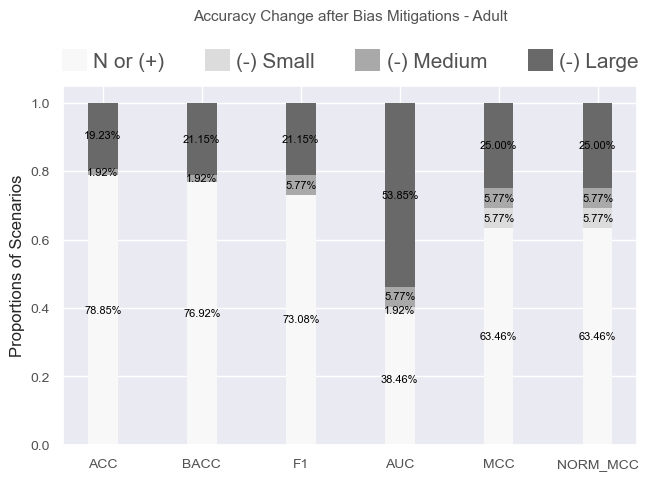

In [21]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Accuracy Change after Bias Mitigations - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,6,0,5,6,4,4,4,0,4
small,0,0,0,0,2,0,1,0,0
medium,0,0,0,0,0,1,1,0,1
large,0,5,0,0,0,1,0,6,1


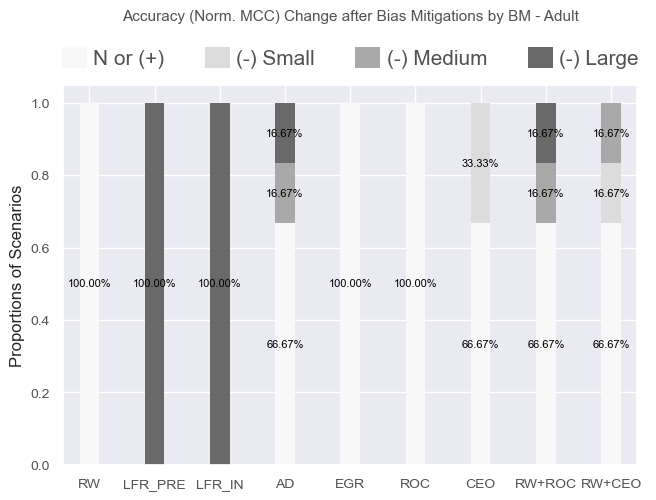

In [22]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by BM - {}', figsize=(8, 6))

In [23]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Accuracy Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Accuracy Behavior After Bias Mitigations per base

,GB,NB,SVM,TabTrans,LR,RF
noorincrease,7,7,7,6,3,3
small,0,0,0,0,1,2
medium,0,0,0,0,2,1
large,2,2,2,1,3,3


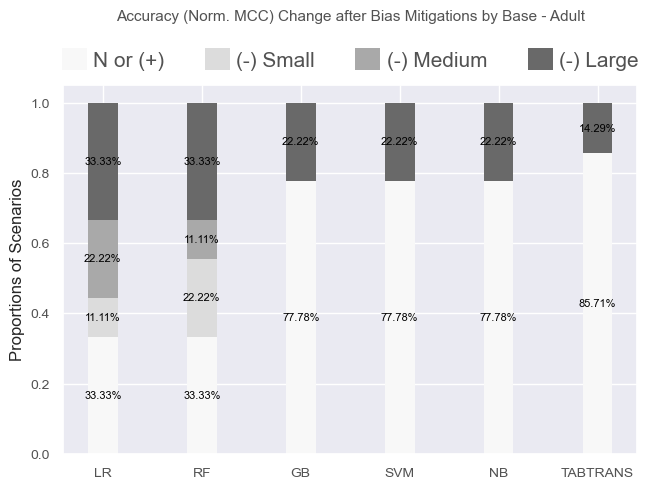

In [24]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by Base - {}', figsize=(8, 6))

In [25]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='base')
# plot_behaviour_analysis(table, data_name, category='base', caption='Accuracy Change after applying Bias Mitigations per Base ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations

,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
noorincrease,17,27,30,42,46,43,52,52
small,0,0,0,0,2,0,0,0
medium,0,0,0,0,0,0,0,0
large,35,25,22,10,4,9,0,0


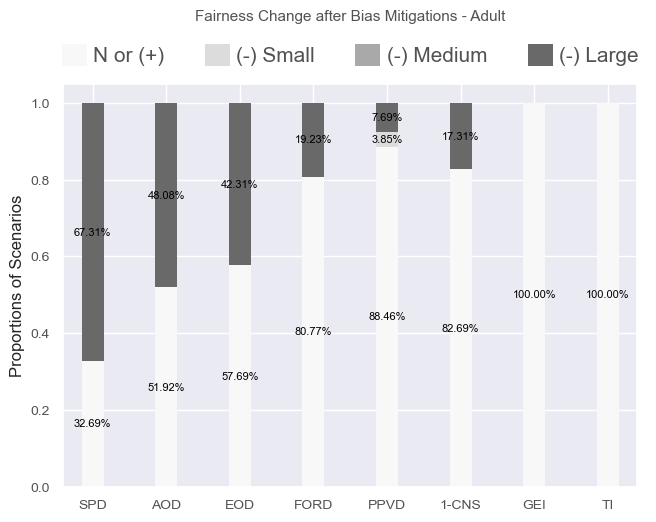

In [26]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Fairness Change after Bias Mitigations - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,3,0,2,1,6,0,5,0,0
small,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,0,0,0
large,3,5,3,5,0,6,1,6,6


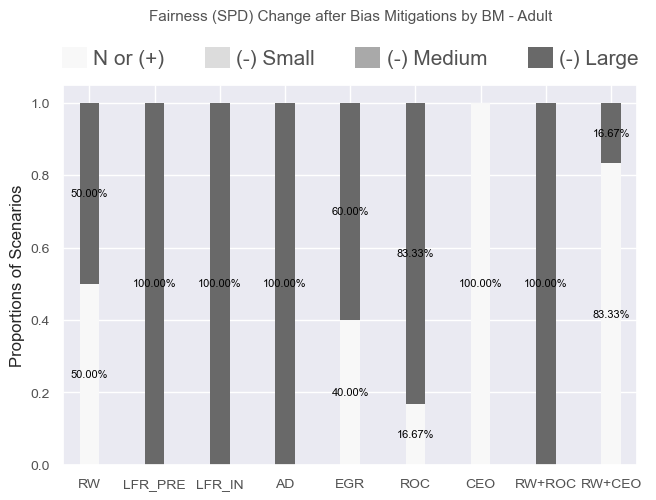

In [27]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Fairness (%s) Change after Bias Mitigations by BM - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

In [28]:
# abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Fairness Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations per base

,GB,NB,SVM,TabTrans,LR,RF
noorincrease,4,2,2,3,2,4
small,0,0,0,0,0,0
medium,0,0,0,0,0,0
large,5,7,7,4,7,5


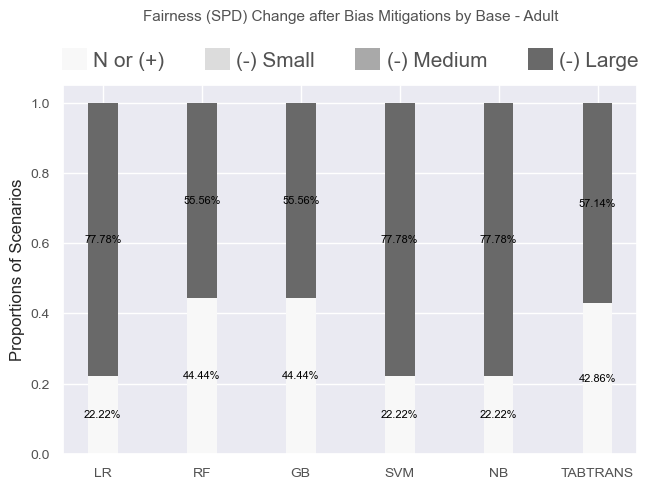

In [29]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Fairness (%s) Change after Bias Mitigations by Base - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

## Accuracy vs. Fairness

### General Results

(slope > 0: trade-off)
We can see from the graphs below:

1. Overall trend: the higher the accuracy, the lower the group fairness (positive slope)
2. But the choice of metrics does matter:
    - group fairness: ford_score showcased no "trade-offs"
    - accuracy metrics: f1_score and roc_auc_score showed milder "trade-offs"
    - same fairness metric combined with different accuracy metrics can present both positive/negative relations, vice versa

In [30]:
import matplotlib.pyplot as plt

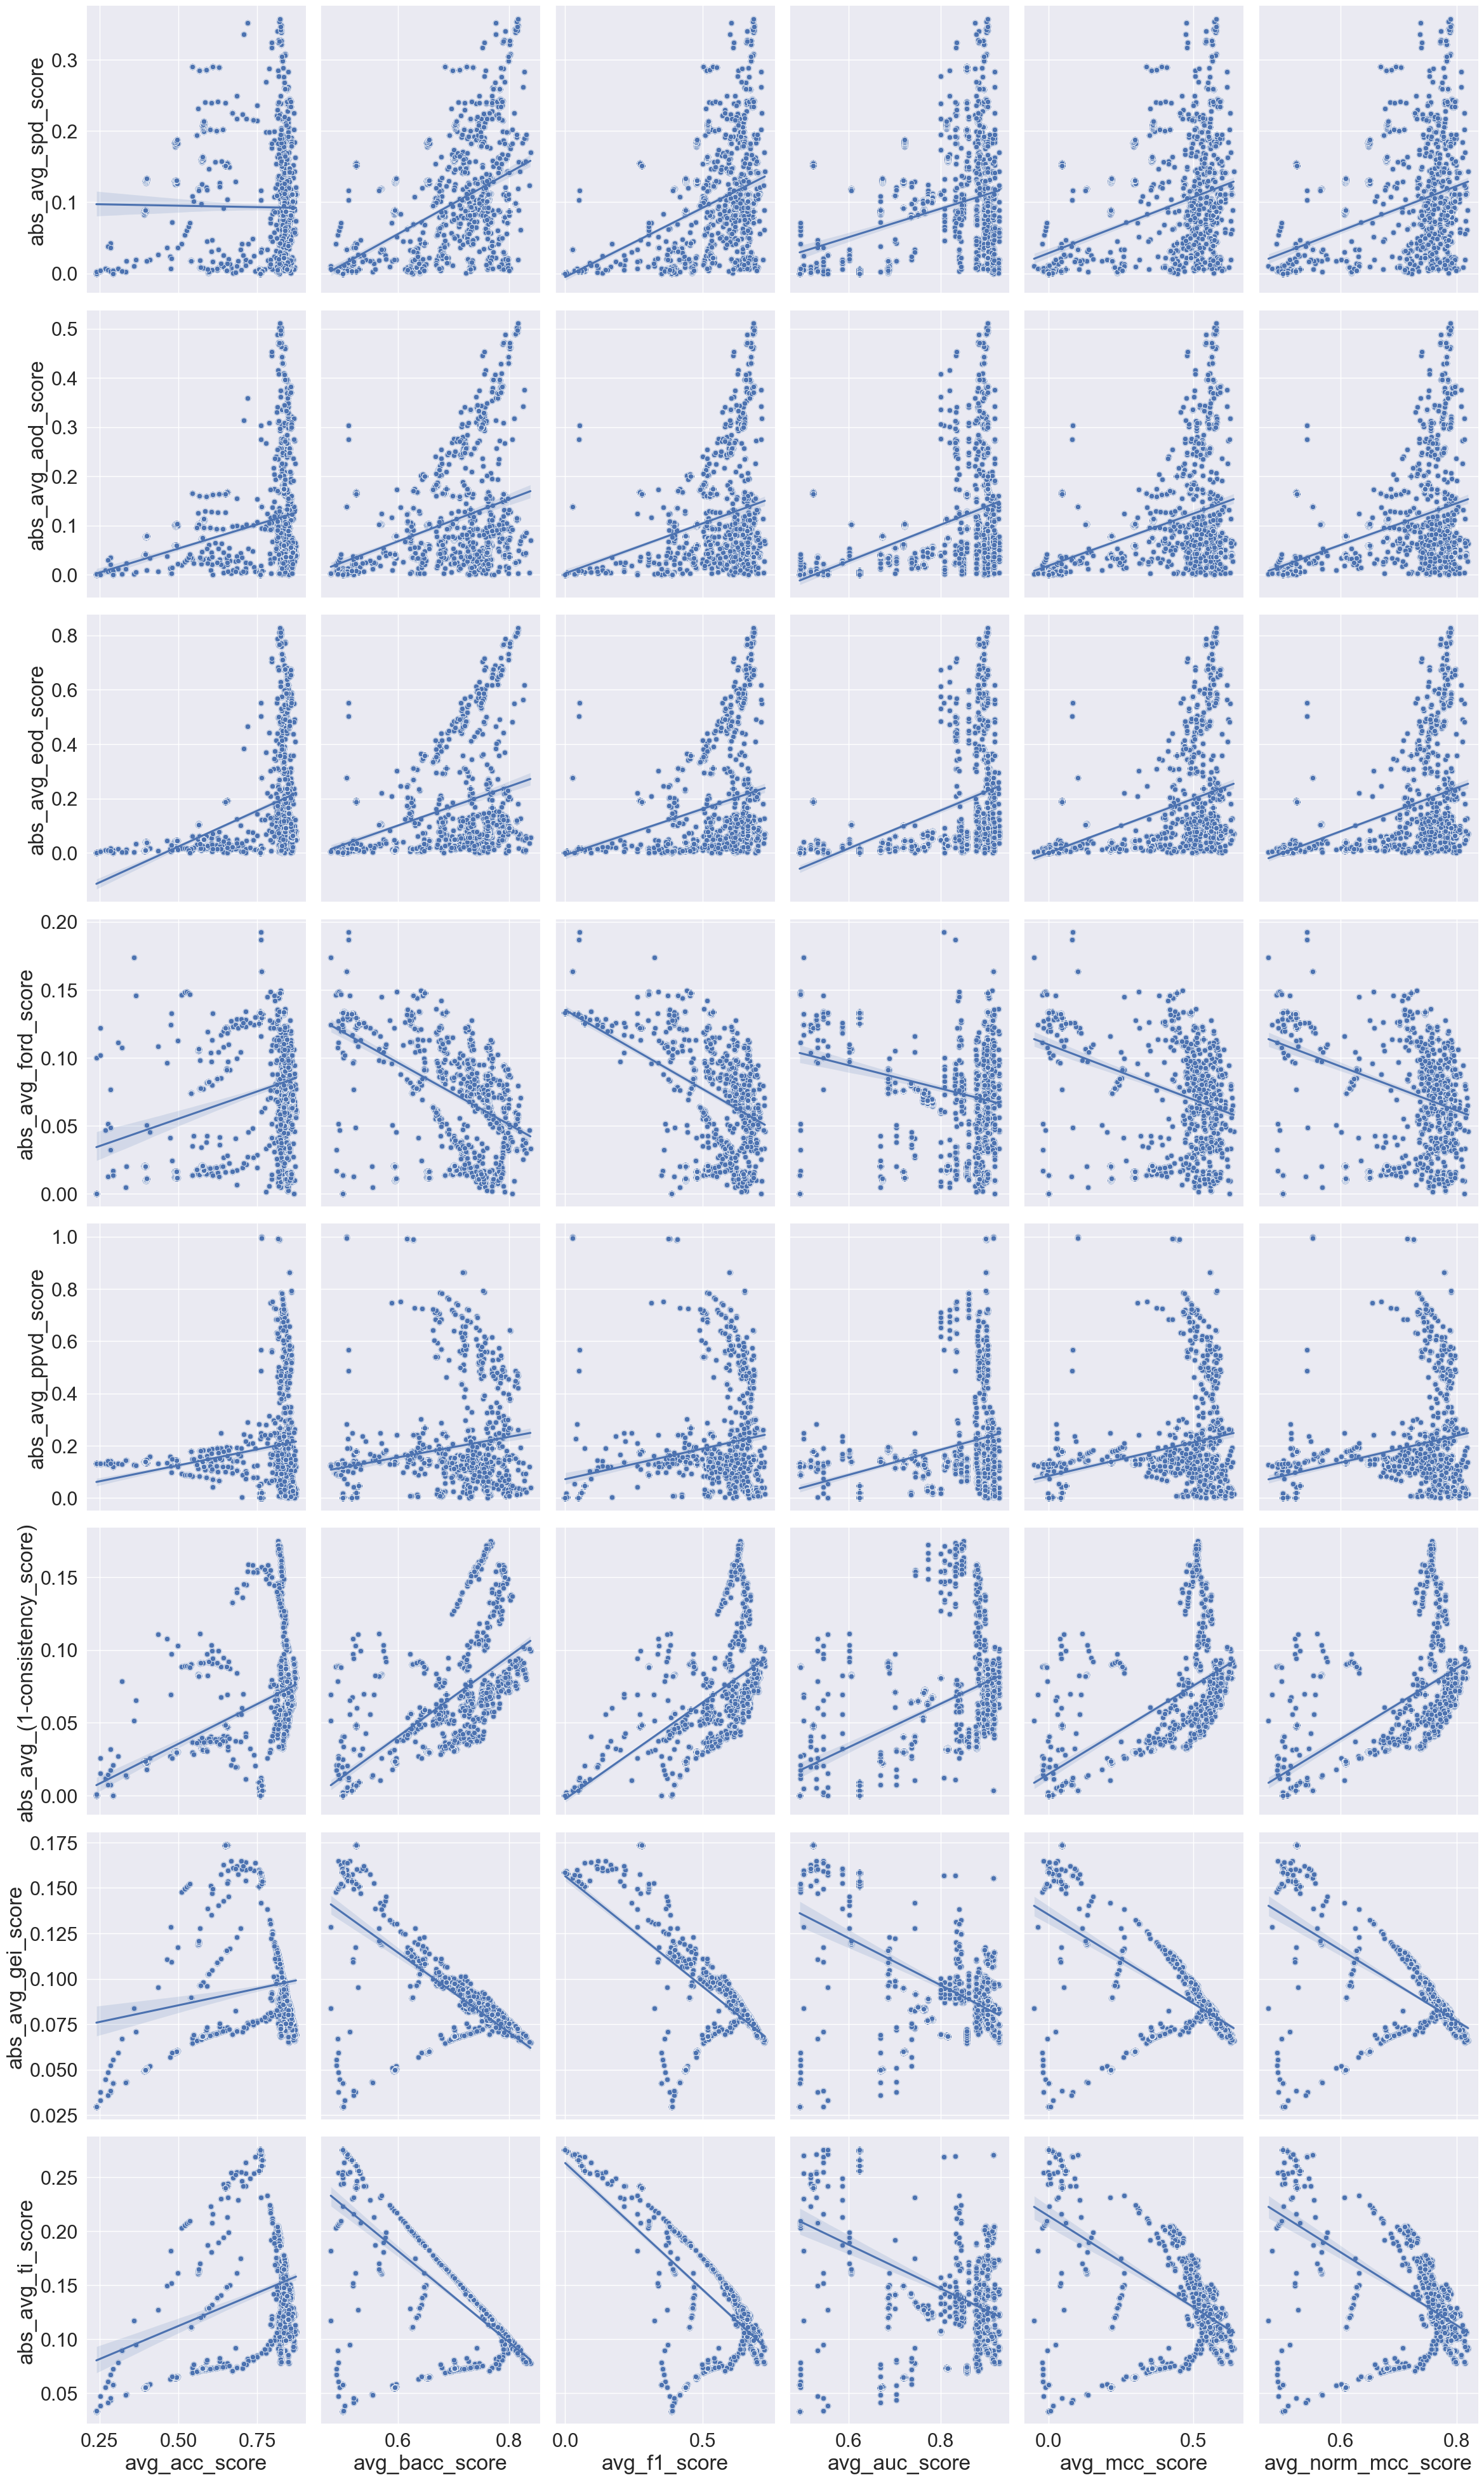

In [31]:
# Set plot font
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})

sns.set(font_scale = 2)
abs_fairness_metrics = ['abs_'+col for col in avg_fairness_metrics]
g = sns.pairplot(data=results_all_converted, x_vars=avg_accuracy_metrics, y_vars=abs_fairness_metrics,
             height=5, aspect=.8, kind="reg")
g.map(sns.scatterplot)

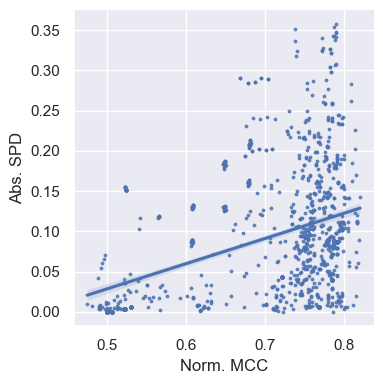

In [32]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, height=4, scatter_kws={'s':3})
# .fig.suptitle("Graph (a)")
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

### Base_estimator specific Results

We can see from the graphs below:
1. Different base_estimators can also generate very different results:
    - SVM (red) the least robust, while "NB" manifest clear trend
    - base_estimators divided into two groups when it comes to consistency_score: tree-based, ensemble (trade-offs) vs non tree-based, non ensemble

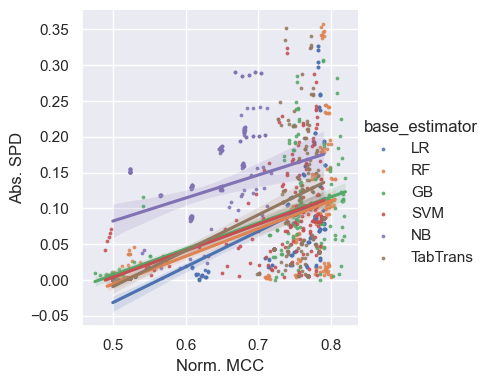

In [33]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='base_estimator', 
               hue_order = ['LR','RF','GB','SVM','NB','TabTrans'], height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_Base'+'.png', bbox_inches='tight')

### Threshold specific Results

We can see from the graphs below:

1. Using different threshold also yiels different results:
    - most obvious with (f1_score, group_fairness) combinations

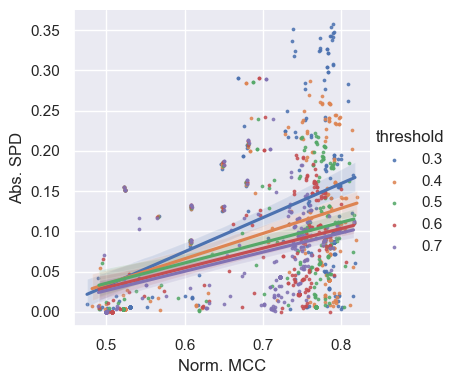

In [34]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

Consideration: put in Appendix?

In [35]:
# for threshold in sorted(results_all_converted.threshold.unique()):
#     sns.set(font_scale = 1)
#     g = sns.lmplot(data=results_all_converted[results_all_converted.threshold==threshold], x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4)
#     ax = plt.gca()
#     ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
#     # save plot
#     g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

### Bias_mitigation specific Results

We can see from the graphs below:

1. Results are clearly divided into two groups
2. Generally with wide C.I.

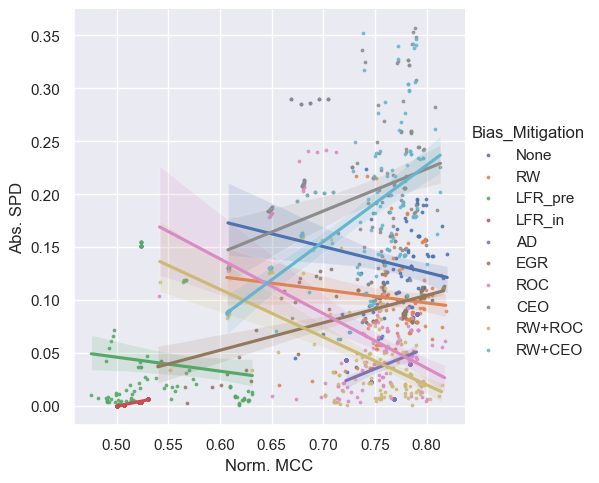

In [36]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='Bias_Mitigation', 
               hue_order=['None','RW','LFR_pre','LFR_in','AD','EGR','ROC','CEO','RW+ROC','RW+CEO'],
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM'+'.png', bbox_inches='tight')

### Bias Mitigation Category

In [40]:
bm_category = {'PRE':['RW', 'LFR_pre'],
               'IN': ['LFR_in','AD','EGR'],
               'POST':['ROC','CEO'],
               'PRE+POST':['RW+ROC','RW+CEO']}

In [41]:
results_all_converted['BM_Category'] = results_all_converted['Bias_Mitigation'].replace({v: k for k, l in bm_category.items()\
                                                                                         for v in l})
results_all_converted[['Bias_Mitigation','BM_Category']].drop_duplicates()

,Bias_Mitigation,BM_Category
0,None,None
5,RW,PRE
10,LFR_pre,PRE
15,EGR,IN
20,ROC,POST
25,CEO,POST
30,RW+ROC,PRE+POST
35,RW+CEO,PRE+POST
435,LFR_in,IN
440,AD,IN


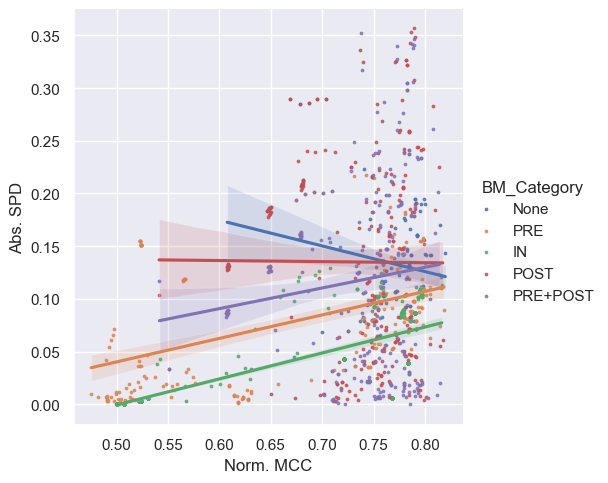

In [42]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='BM_Category', 
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM_Category'+'.png', bbox_inches='tight')

## Heatmap

No clear trend between group and individual fairness with a few exceptions

In [45]:
# change column name so metrics name get more concise in the heatmaps
accuracy_map = [col.removeprefix('avg_').removesuffix('_score').upper() for col in avg_accuracy_metrics]
print(accuracy_map)
fairness_map = [col.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper() for col in abs_avg_fairness_metrics]
fairness_map = ['1-CNS' if x=='(1-CONSISTENCY_SCORE)' else x for x in fairness_map]
print(fairness_map)

acc_rename = {avg_accuracy_metrics[i]:accuracy_map[i] for i in range(len(accuracy_map))}
fair_rename = {abs_avg_fairness_metrics[i]:fairness_map[i] for i in range(len(fairness_map))}
results_all_converted = results_all_converted.rename(columns=acc_rename).rename(columns=fair_rename)

['ACC', 'BACC', 'F1', 'AUC', 'MCC', 'NORM_MCC']
['SPD', 'AOD', 'EOD', 'FORD', 'PPVD', '1-CNS', 'GEI', 'TI']


### Original Metrics

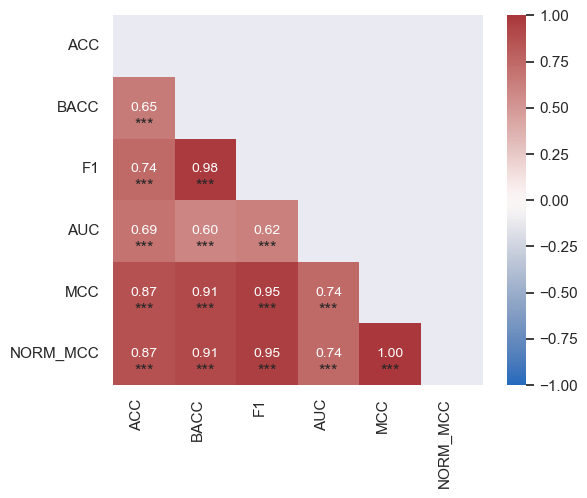

In [46]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

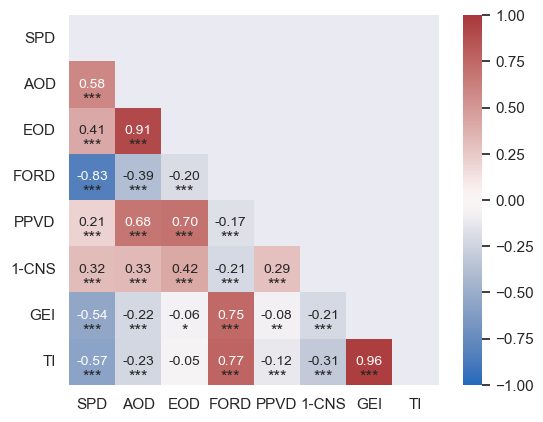

In [47]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

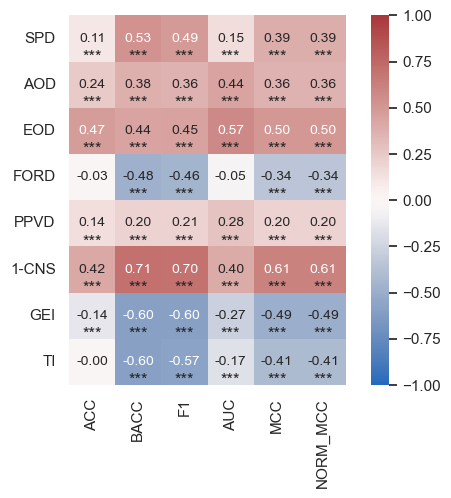

In [48]:
# original, spearman
g = corr_heatmap_with_significance_acc_fair(results_all_converted[accuracy_map+fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_fair_corr'+'.png', bbox_inches='tight')

### Changes of Metrics

In [49]:
df_metric_diff = get_df_metric_diff(results_all_converted, metric_list=accuracy_map+fairness_map)
df_metric_diff

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,dataset,RF,RW,0.002261,-0.002761,-0.000487,-0.000635,-0.001479,-0.000740,-0.035072,-0.036583,-0.039260,0.007427,0.061867,-0.000302,0.000781,0.002186
1,dataset,RF,RW,0.000366,-0.001869,-0.001153,-0.000406,-0.002003,-0.001002,-0.037449,-0.040908,-0.045799,0.007150,0.071471,0.001201,0.000556,0.001239
2,dataset,RF,RW,0.001119,0.001960,0.002275,0.001050,0.003280,0.001640,-0.028106,-0.032938,-0.038294,0.004010,0.059485,0.001232,-0.000591,-0.000973
3,dataset,RF,RW,-0.000797,-0.001655,-0.001783,-0.000027,-0.002633,-0.001317,-0.034254,-0.043465,-0.056056,0.008277,0.060285,-0.000314,0.000490,0.000848
4,dataset,RF,RW,0.000086,-0.003584,-0.003247,-0.000635,-0.002629,-0.001315,-0.031997,-0.052447,-0.079738,0.011354,0.070333,0.000245,0.000701,0.002064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,dataset,RF,AD,-0.022563,-0.046014,-0.085873,-0.013913,-0.079937,-0.039969,-0.070363,0.115103,0.213144,0.060972,0.227731,0.009990,0.015602,0.025786
16,dataset,RF,AD,-0.015458,-0.025437,-0.056363,-0.010610,-0.061467,-0.030733,-0.020534,0.157821,0.281337,0.057050,0.260111,0.006343,0.010891,0.014903
17,dataset,RF,AD,-0.017181,-0.027702,-0.061338,-0.014048,-0.068324,-0.034162,-0.021113,0.157791,0.281267,0.057463,0.258955,0.008423,0.012063,0.016250
18,dataset,RF,AD,-0.016557,-0.030563,-0.066842,-0.009077,-0.064486,-0.032243,-0.021979,0.163996,0.296037,0.056304,0.261498,0.003552,0.011805,0.017715


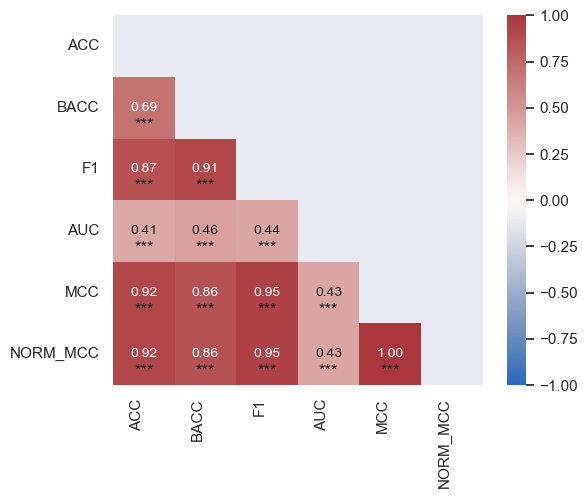

In [50]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_change_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

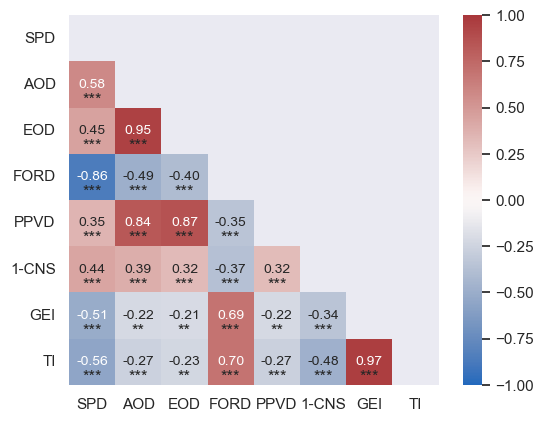

In [51]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_change_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])